# Victor

In [1]:
import pandas as pd

# === Load dataset ===
data_initial = pd.read_csv("breastcancerdata.csv")
data_initial

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# 1: The Very Basics
## Getting rid of the empty column at the end and the addition of a new column with a binary tag for the diagnosis

In [2]:
import numpy as np

# Drop fully empty column at the end which apparently is a thing with kaggle datasets
if 'Unnamed: 32' in data_initial.columns:
    data_C1 = data_initial.drop(columns=['Unnamed: 32'])

# Map diagnosis to binary label (M=1 malignant, B=0 benign)
if data_C1['diagnosis'].dtype == object:
    data_C1['diagnosis_label'] = data_C1['diagnosis'].map({'M':1, 'B':0})
else:
    data_C1['diagnosis_label'] = (data_C1['diagnosis'] == data_C1['diagnosis'].unique()[0]).astype(int)

print("Loaded dataset with shape:", data_C1.shape)
print("Columns:", data_C1.columns.tolist())

data_C1


Loaded dataset with shape: (569, 33)
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_label']


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# 2: Balance Check
## Target class counting for an appreciation of the balance for the target.
### Also checks for duplicates and missing values although the quality of the dataset means there's none

Class counts (0=benign, 1=malignant):
 diagnosis_label
0    357
1    212
Name: count, dtype: int64

Class percentages:
 diagnosis_label
0    0.627417
1    0.372583
Name: proportion, dtype: float64


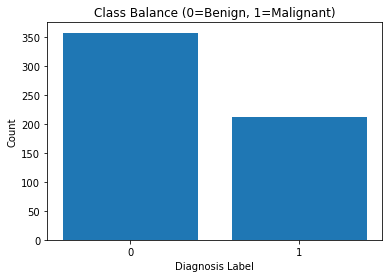


Missing values per column (top 10):
 id                         0
compactness_se             0
fractal_dimension_worst    0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
dtype: int64

Number of duplicate rows: 0


In [3]:
import matplotlib.pyplot as plt

# Class counts
class_counts = data_C1['diagnosis_label'].value_counts().sort_index()
class_pct = data_C1['diagnosis_label'].value_counts(normalize=True).sort_index()

print("Class counts (0=benign, 1=malignant):\n", class_counts)
print("\nClass percentages:\n", class_pct)

# Bar chart for class balance
plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title("Class Balance (0=Benign, 1=Malignant)")
plt.xlabel("Diagnosis Label")
plt.ylabel("Count")
plt.show()

# Missing values per column
missing = data_C1.isna().sum().sort_values(ascending=False)
print("\nMissing values per column (top 10):\n", missing.head(10))

# Duplicates
num_duplicates = data_C1.duplicated().sum()
print("\nNumber of duplicate rows:", num_duplicates)


# 3: Histograms and Summary
## Here we create histograms of each available feature and use the describe function to get a basic statistical picture of the data. We also sort each feature by correlation to the target.

Number of numeric feature columns: 30
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


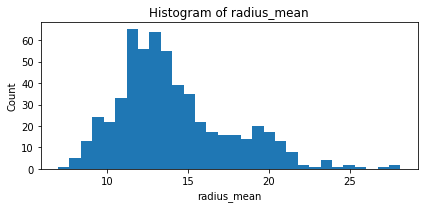

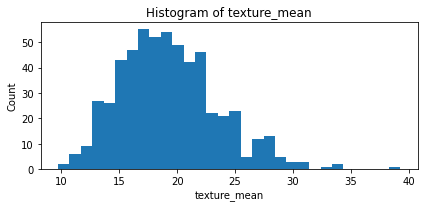

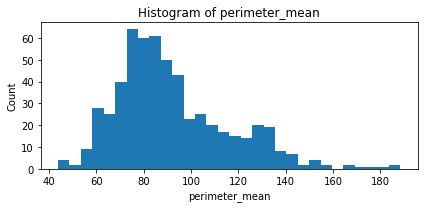

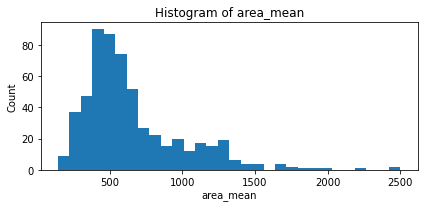

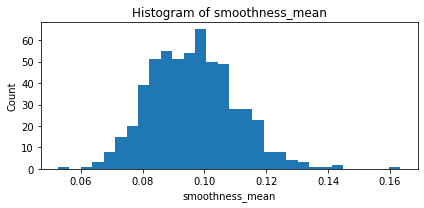

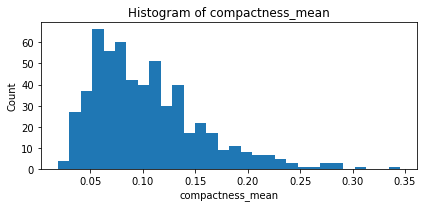

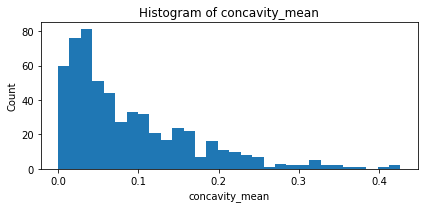

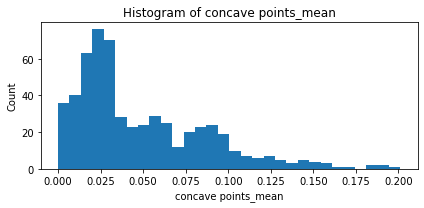

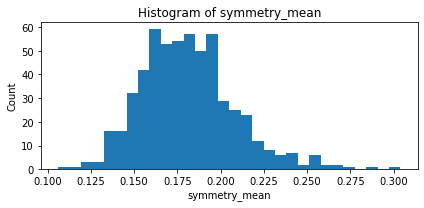

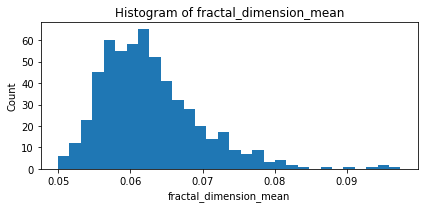

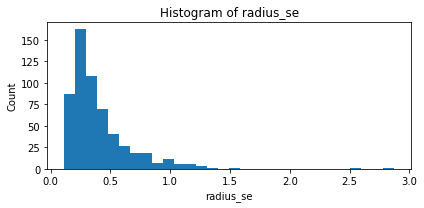

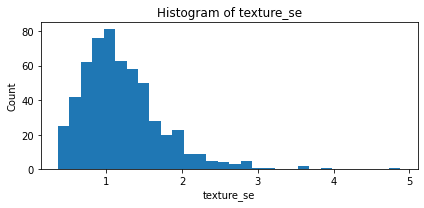

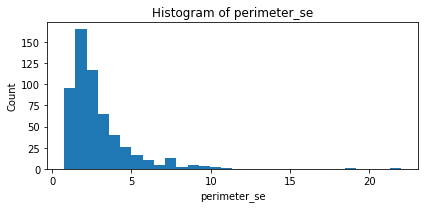

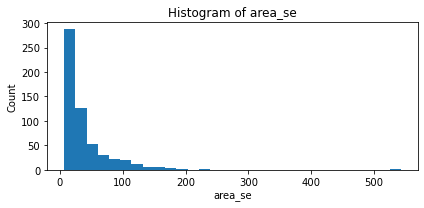

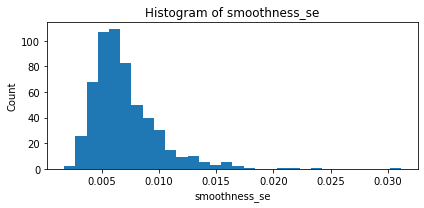

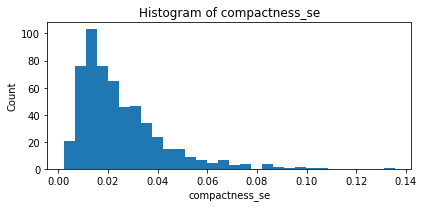

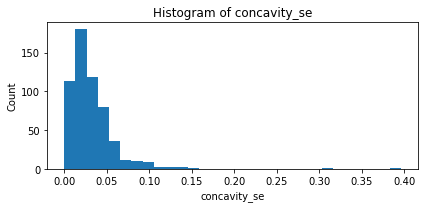

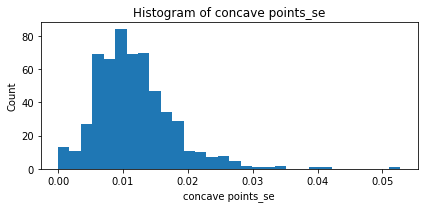

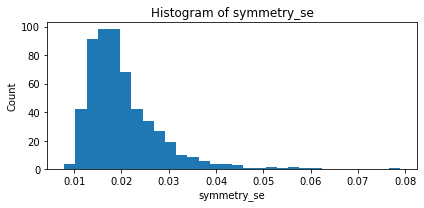

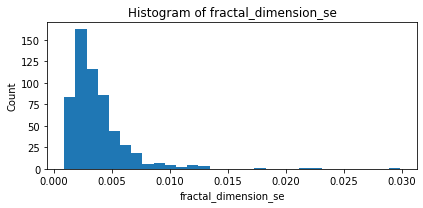

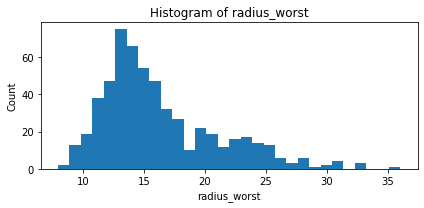

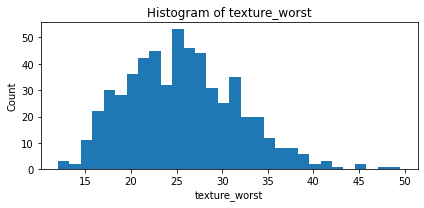

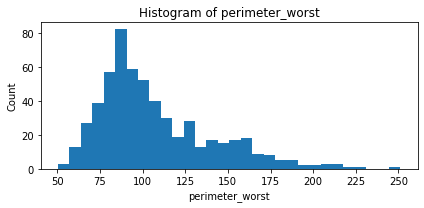

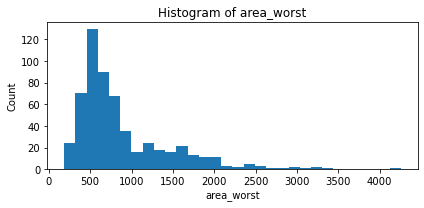

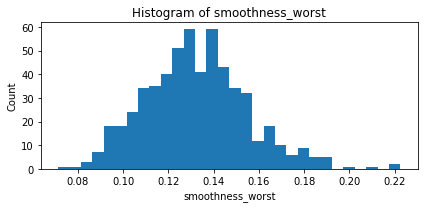

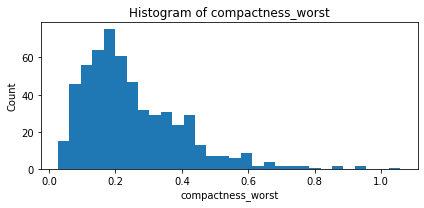

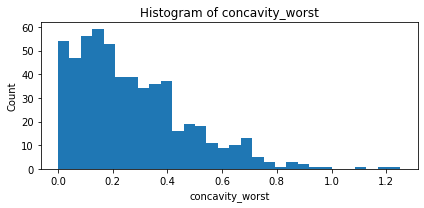

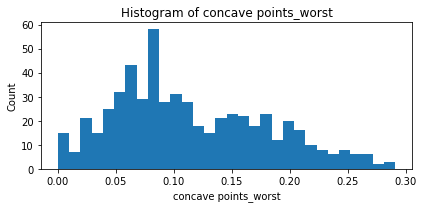

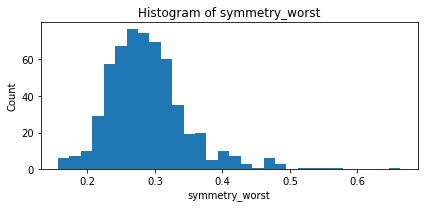

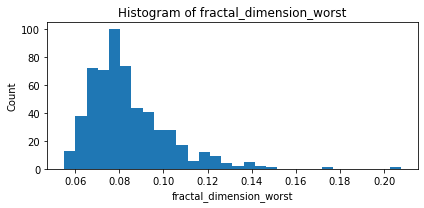

,count,mean,std,min,25%,50%,75%,max,corr_with_target
concave points_worst,569.0,0.114606,0.065732,0.000000,0.064930,0.099930,0.161400,0.29100,0.793566
perimeter_worst,569.0,107.261213,33.602542,50.410000,84.110000,97.660000,125.400000,251.20000,0.782914
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,0.776614
radius_worst,569.0,16.269190,4.833242,7.930000,13.010000,14.970000,18.790000,36.04000,0.776454
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,0.742636
area_worst,569.0,880.583128,569.356993,185.200000,515.300000,686.500000,1084.000000,4254.00000,0.733825
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,0.730029
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,0.708984
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,0.696360
concavity_worst,569.0,0.272188,0.208624,0.000000,0.114500,0.226700,0.382900,1.25200,0.659610


In [4]:
import matplotlib.pyplot as plt

# Ensure df is loaded (from previous cells)
# numeric_cols were computed previously; if not, recompute:
exclude = {'id', 'diagnosis', 'diagnosis_label'}
numeric_cols = [c for c in data_C1.columns if c not in exclude and pd.api.types.is_numeric_dtype(data_C1[c])]

print("Number of numeric feature columns:", len(numeric_cols))
print(numeric_cols)

# Display summary statistics
summary = data_C1[numeric_cols].describe().T
summary['corr_with_target'] = data_C1[numeric_cols].corrwith(data_C1['diagnosis_label']).abs()
summary = summary.sort_values('corr_with_target', ascending=False)


# Histograms — one chart per feature (will produce many plots)
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.hist(data_C1[col].dropna(), bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

summary

# 4A: Correlations Between Features
## We create a heatmap to visualize the correlation between different features. The purpose is to possibly exclude highly correlated features.

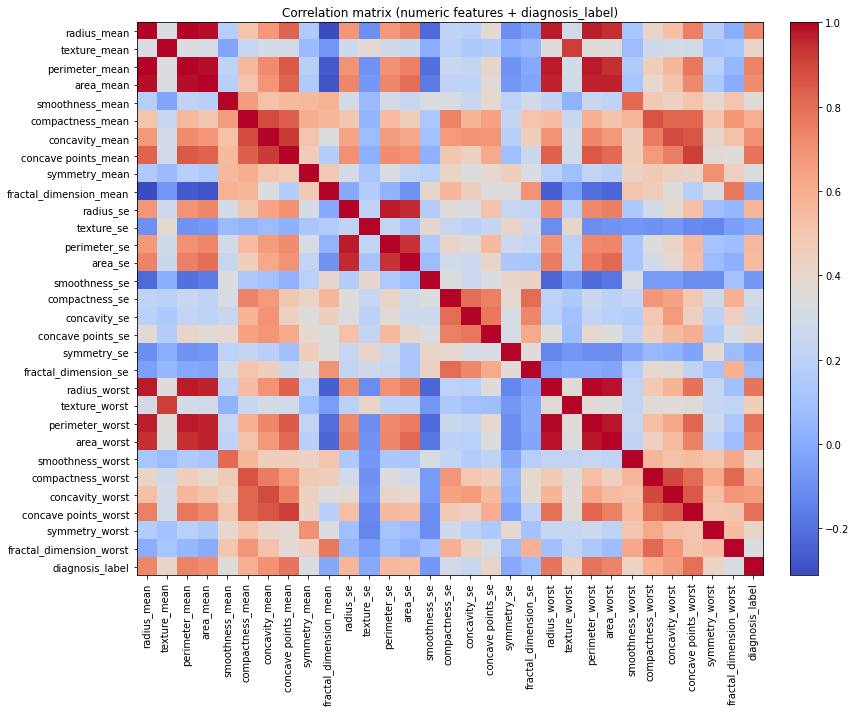

In [5]:
import matplotlib.pyplot as plt
import numpy as np

corr = data_C1[numeric_cols + ['diagnosis_label']].corr()

# Plot correlation matrix (imshow)
plt.figure(figsize=(12,10))
cax = plt.imshow(corr, aspect='auto', interpolation='nearest', cmap='coolwarm')
plt.colorbar(cax, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title('Correlation matrix (numeric features + diagnosis_label)')
plt.tight_layout()
plt.show()


# 4B: Here we identify extremely high correlations: 0.95 and higher.

In [6]:
corr_series = corr.unstack()

threshold = 0.95  # Define your correlation threshold: arbitrary choice

# Filter for correlations exceeding the absolute threshold
high_corr_series = corr_series[abs(corr_series) >= threshold]

# Remove self-correlations (where feature1 == feature2)
high_corr_series = high_corr_series[high_corr_series.index.get_level_values(0) != high_corr_series.index.get_level_values(1)]

# Remove duplicate pairs (e.g., ('A', 'B') and ('B', 'A'))
 # This can be done by ensuring the first feature is alphabetically smaller than the second
filtered_pairs = []
for (feature1, feature2), correlation_value in high_corr_series.items():
    if feature1 < feature2:
        filtered_pairs.append(((feature1, feature2), correlation_value))

# Convert the list back to a Series or DataFrame for better presentation if needed
high_corr_pairs = pd.Series(dict(filtered_pairs))

print("Correlation pairs exceeding the threshold:")
print(high_corr_pairs)

Correlation pairs exceeding the threshold:
radius_mean      radius_worst       0.969539
perimeter_mean   radius_mean        0.997855
                 radius_worst       0.969476
                 perimeter_worst    0.970387
area_mean        radius_mean        0.987357
                 perimeter_mean     0.986507
                 radius_worst       0.962746
                 perimeter_worst    0.959120
                 area_worst         0.959213
perimeter_se     radius_se          0.972794
area_se          radius_se          0.951830
perimeter_worst  radius_mean        0.965137
                 radius_worst       0.993708
area_worst       radius_worst       0.984015
                 perimeter_worst    0.977578
dtype: float64


# 4C: Here we attempt to exclude some of the features included in the selected pairs

In [7]:
data_C2 = data_C1.drop('radius_mean', axis=1) # highly correlated with perimeter mean but also less correlated to the target relative to peri mean
data_C3 = data_C2.drop('area_mean', axis=1) # same logic as before
data_C4 = data_C3.drop('perimeter_se', axis=1)
data_C5 = data_C4.drop('area_se', axis=1)
data_C6 = data_C5.drop('radius_worst', axis=1)
data_C7 = data_C6.drop('area_worst', axis=1)
data_C8 = data_C7.drop('perimeter_mean', axis=1)

numeric_cols2 = [c for c in data_C8.columns if c not in exclude and pd.api.types.is_numeric_dtype(data_C8[c])]

data_C8

,id,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
0,842302,M,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.006193,17.33,184.60,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,23.41,158.80,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.004571,25.53,152.50,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.009208,26.50,98.87,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,16.67,152.20,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.004239,26.40,166.10,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.002498,38.25,155.00,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.003892,34.12,126.70,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.006185,39.42,184.60,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# 5A: Outlier Analysis
## Determination of outliers for the eventual purpose of cleanup of extremes.

In [8]:
outlier_summary = []

for col in numeric_cols2:
    threshold = data_C8[col].quantile(0.95)   # 95th percentile cutoff
    outlier_count = (data_C8[col] > threshold).sum()
    outlier_pct = outlier_count / len(data_C8)
    
    df_filtered = data_C8[(data_C8[col] <= threshold)]

    outlier_summary.append({
        'feature': col,
        '95th_percentile_threshold': threshold,
        'outlier_count': outlier_count,
        'outlier_percentage': outlier_pct
    })

# Convert to DataFrame for display
outlier_df = pd.DataFrame(outlier_summary)

# Sort by number of outliers (descending)
outlier_df = outlier_df.sort_values('outlier_count', ascending=False)

print("\nTop 5% Outlier Counts per Feature:\n")
display(outlier_df)


Top 5% Outlier Counts per Feature:



,feature,95th_percentile_threshold,outlier_count,outlier_percentage
11,concavity_se,0.078936,29,0.050967
12,concave points_se,0.022884,29,0.050967
21,symmetry_worst,0.406160,29,0.050967
20,concave points_worst,0.236920,29,0.050967
19,concavity_worst,0.682380,29,0.050967
18,compactness_worst,0.564120,29,0.050967
17,smoothness_worst,0.171840,29,0.050967
16,perimeter_worst,171.640000,29,0.050967
15,texture_worst,36.300000,29,0.050967
14,fractal_dimension_se,0.007960,29,0.050967


# 5B: Getting rid of the top 5% outliers

In [9]:
# Compute thresholds (95th percentile for each feature)
thresholds = {col: data_C8[col].quantile(0.95) for col in numeric_cols2}

# Build a mask: keep rows that are BELOW or equal to thresholds
mask = np.ones(len(data_C8), dtype=bool)

for col in numeric_cols2:
    mask &= (data_C8[col] <= thresholds[col])

# Apply mask
df_clean = data_C8[mask].reset_index(drop=True)

print("Original dataset shape:", data_C8.shape)
print("New dataset shape after removing top-5% outliers:", df_clean.shape)

df_clean

Original dataset shape: (569, 26)
New dataset shape after removing top-5% outliers: (375, 26)


,id,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
0,842517,M,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,23.41,158.80,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902,1
1,84358402,M,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,16.67,152.20,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678,1
2,844359,M,19.98,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,...,0.002179,27.66,153.20,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368,1
3,845636,M,23.24,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,...,0.003042,33.88,123.80,0.11810,0.15510,0.1459,0.09975,0.2948,0.08452,1
4,84610002,M,17.89,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,0.5058,...,0.004144,27.28,136.50,0.13960,0.56090,0.3965,0.18100,0.3792,0.10480,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,923748,B,21.48,0.07431,0.04227,0.00000,0.00000,0.1661,0.05948,0.3163,...,0.002228,24.77,74.08,0.10010,0.07348,0.0000,0.00000,0.2458,0.06592,0
371,923780,B,22.44,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,0.2800,...,0.004723,28.26,77.80,0.10870,0.17820,0.1564,0.06413,0.3169,0.08032,0
372,925277,B,22.68,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,0.2254,...,0.004406,27.27,105.90,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004,0
373,925292,B,27.15,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,...,0.005304,33.17,100.20,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,0


# 6A: Features Best Correlated with Target
## Some boxplots that correspond to the top 6 most correlated features with the target, after the columns have been cleaned up

Top features to visualize by boxplot: ['perimeter_worst', 'concave points_mean', 'concave points_worst', 'concavity_mean', 'concavity_worst', 'radius_se']


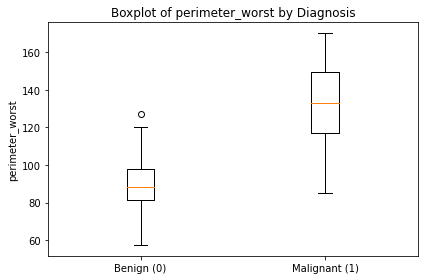

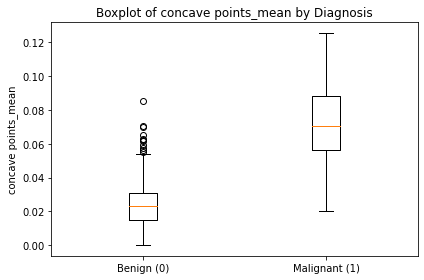

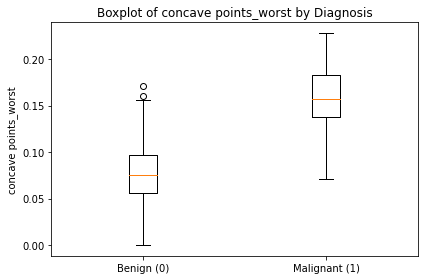

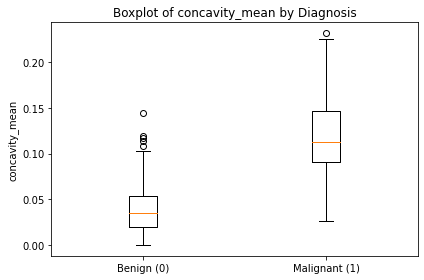

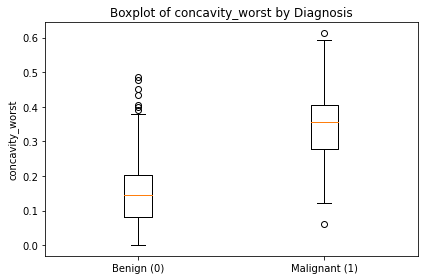

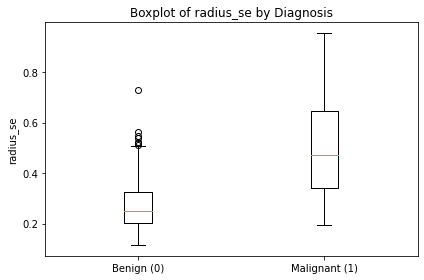

In [10]:
corr3 = df_clean[numeric_cols2 + ['diagnosis_label']].corr()

target_corr = corr3['diagnosis_label'].drop('diagnosis_label').sort_values(key=lambda s: s.abs(), ascending=False)

top_feats = target_corr.index.tolist()[:6]
print("Top features to visualize by boxplot:", top_feats)

for feat in top_feats:
    data_b = df_clean[df_clean['diagnosis_label']==0][feat].dropna()
    data_m = df_clean[df_clean['diagnosis_label']==1][feat].dropna()
    plt.figure(figsize=(6,4))
    plt.boxplot([data_b, data_m], labels=['Benign (0)', 'Malignant (1)'])
    plt.title(f'Boxplot of {feat} by Diagnosis')
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()


# 6B: The rest of the correlation with the target for the rest of the features based on the cleaned dataset along with summary stats

In [11]:
summary_clean = df_clean[numeric_cols2].describe().T
summary_clean['corr_with_target'] = df_clean[numeric_cols2].corrwith(df_clean['diagnosis_label']).abs()
summary_clean = summary_clean.sort_values('corr_with_target', ascending=False)
summary_clean

,count,mean,std,min,25%,50%,75%,max,corr_with_target
perimeter_worst,375.0,100.918720,24.371166,57.260000,84.095000,95.100000,113.100000,170.300000,0.799369
concave points_mean,375.0,0.036815,0.026494,0.000000,0.018650,0.028640,0.052555,0.125500,0.771763
concave points_worst,375.0,0.097043,0.049778,0.000000,0.061960,0.085860,0.133200,0.228000,0.739587
concavity_mean,375.0,0.059843,0.046969,0.000000,0.025605,0.045480,0.084350,0.231900,0.731271
concavity_worst,375.0,0.207025,0.133899,0.000000,0.104850,0.183800,0.300050,0.613300,0.653277
radius_se,375.0,0.328048,0.165707,0.114400,0.218350,0.278700,0.383350,0.955300,0.631038
compactness_mean,375.0,0.085045,0.032903,0.019380,0.059735,0.078990,0.108700,0.198000,0.521600
compactness_worst,375.0,0.205767,0.099354,0.034320,0.135900,0.188100,0.256850,0.560900,0.512111
texture_worst,375.0,24.266613,5.031224,12.020000,20.400000,24.470000,27.925000,35.640000,0.451406
concave points_se,375.0,0.009969,0.004153,0.000000,0.006866,0.009423,0.012685,0.022580,0.442319


In [12]:
# Save the DataFrame to a CSV file
# index=False prevents writing the DataFrame index as a column in the CSV
df_clean.to_csv('final_project_cleaned_data1.csv', index=False)

# Tree Models
## -Victor

Class counts (0=benign, 1=malignant):
 diagnosis_label
0    277
1     98
Name: count, dtype: int64

Class percentages:
 diagnosis_label
0    0.738667
1    0.261333
Name: proportion, dtype: float64


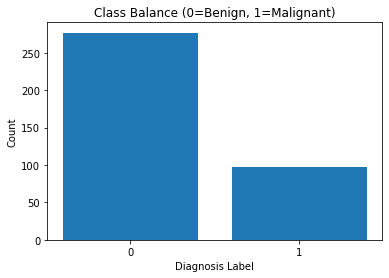

In [13]:
# Class counts
class_counts = df_clean['diagnosis_label'].value_counts().sort_index()
class_pct = df_clean['diagnosis_label'].value_counts(normalize=True).sort_index()

print("Class counts (0=benign, 1=malignant):\n", class_counts)
print("\nClass percentages:\n", class_pct)

# Bar chart for class balance
plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title("Class Balance (0=Benign, 1=Malignant)")
plt.xlabel("Diagnosis Label")
plt.ylabel("Count")
plt.show()


In [14]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

# ---------------- SETTINGS ----------------
DATA_PATH = "final_project_cleaned_data1.csv"
RANDOM_STATE = 42
CV_FOLDS = 5
SCORER = "recall_macro"     # ← PRIORITIZE RECALL

In [15]:
# -------- LOAD DATA --------
df = pd.read_csv(DATA_PATH)
target_col = "diagnosis_label"    # ← your target column name

X = df[numeric_cols2]
y = df[target_col]

# If categorical target, encode:
if y.dtype == object:
    y = pd.Categorical(y).codes

print(f"Dataset shape: {df.shape}")
print("Target distribution:", np.bincount(y))

# -------- PREPROCESSING --------
numeric_cols = X.select_dtypes(include="number").columns.tolist()
categorical_cols = X.select_dtypes(exclude="number").columns.tolist()

numeric_prepro = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_prepro = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_prepro, numeric_cols),
    ("cat", categorical_prepro, categorical_cols)
])

Dataset shape: (375, 26)
Target distribution: [277  98]


In [16]:
# -------- BASELINE MODEL (Recall-first) --------
baseline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", DecisionTreeClassifier(
        random_state=RANDOM_STATE,
        class_weight="balanced"      # ← accounts for imbalance
    ))
])

skf = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)

print("\n---- BASELINE MODEL (Recall Optimized) ----")
base_scores = cross_val_score(baseline, X, y, cv=skf, scoring=SCORER)
print("Baseline Recall:", base_scores.mean(), "±", base_scores.std())

# Holdout test evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)
baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)
print("\nBaseline classification report:")
print(classification_report(y_test, y_pred))


---- BASELINE MODEL (Recall Optimized) ----
Baseline Recall: 0.8994275461380724 ± 0.04545787495707528

Baseline classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.86      0.95      0.90        20

    accuracy                           0.95        75
   macro avg       0.92      0.95      0.93        75
weighted avg       0.95      0.95      0.95        75




---- GRID SEARCH (Recall Optimized) ----
Fitting 5 folds for each of 320 candidates, totalling 1600 fits

Best Recall: 0.9270352016404647
Best Params: {'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': 8, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5}

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       277
           1       0.92      0.98      0.95        98

    accuracy                           0.97       375
   macro avg       0.96      0.98      0.97       375
weighted avg       0.97      0.97      0.97       375



<Figure size 360x288 with 0 Axes>

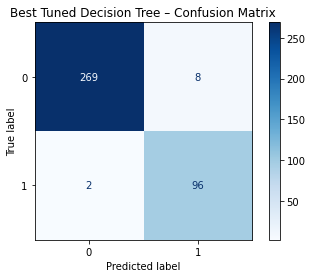

In [17]:
# -------- GRID SEARCH (Recall-focused) --------
param_grid = {
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [3, 5, 8, 12, None],
    "clf__min_samples_split": [2, 5, 10, 20],
    "clf__min_samples_leaf": [1, 2, 4, 8],
    "clf__class_weight": ["balanced", None]   # ← let tuning decide
}

model = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=RANDOM_STATE))
])

print("\n---- GRID SEARCH (Recall Optimized) ----")
grid = GridSearchCV(
    model, param_grid, cv=skf,
    scoring=SCORER, n_jobs=-1, verbose=1
)
grid.fit(X, y)

best_model = grid.best_estimator_
print("\nBest Recall:", grid.best_score_)
print("Best Params:", grid.best_params_)

# Test performance of best model
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X)
print("\nBest Model Classification Report:")
print(classification_report(y, y_pred_best))

# ---- CONFUSION MATRIX (Best Model) ----
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm_best = confusion_matrix(y, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best)
plt.figure(figsize=(5,4))
disp.plot(values_format='d',cmap='Blues')
plt.title("Best Tuned Decision Tree – Confusion Matrix")
plt.show()


Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       357
           1       0.95      0.95      0.95       212

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



<Figure size 360x288 with 0 Axes>

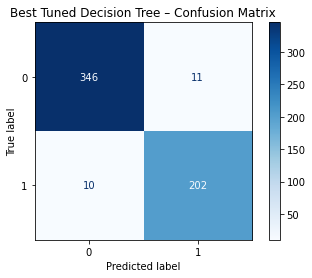

In [18]:
# Test using the original sample size without the cleaning to validate over as much of the data as possible
X_c8=data_C8[numeric_cols2]
y_c8=data_C8[target_col]

# Test performance of best model
best_model.fit(X_train, y_train)
y_pred_c8 = best_model.predict(X_c8)
print("\nBest Model Classification Report:")
print(classification_report(y_c8, y_pred_c8))

# ---- CONFUSION MATRIX (Best Model) ----
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm_c8 = confusion_matrix(y_c8, y_pred_c8)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_c8)
plt.figure(figsize=(5,4))
disp.plot(values_format='d',cmap='Blues')
plt.title("Best Tuned Decision Tree – Confusion Matrix")
plt.show()

                         feature  importance
16          num__perimeter_worst    0.826869
15            num__texture_worst    0.111523
20     num__concave points_worst    0.038328
22  num__fractal_dimension_worst    0.016714
19          num__concavity_worst    0.002411
4       num__concave points_mean    0.002316
1           num__smoothness_mean    0.001839
13              num__symmetry_se    0.000000
21           num__symmetry_worst    0.000000
18        num__compactness_worst    0.000000
17         num__smoothness_worst    0.000000
14     num__fractal_dimension_se    0.000000
0              num__texture_mean    0.000000
12        num__concave points_se    0.000000
10           num__compactness_se    0.000000
9             num__smoothness_se    0.000000
8                num__texture_se    0.000000
7                 num__radius_se    0.000000
6    num__fractal_dimension_mean    0.000000
5             num__symmetry_mean    0.000000
3            num__concavity_mean    0.000000
2         

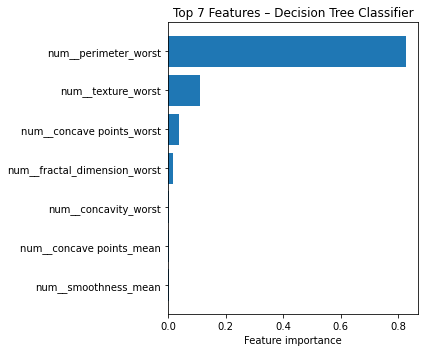

In [25]:
# -------- FEATURE IMPORTANCE --------
tree = best_model.named_steps["clf"]

importances = tree.feature_importances_
feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()

fi = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
      .sort_values("importance", ascending=False)
)

print(fi)

# Plot top 10
top_k = 7
fi_top = fi.head(top_k).sort_values("importance")

plt.figure(figsize=(6, 5))
plt.barh(fi_top["feature"], fi_top["importance"])
plt.xlabel("Feature importance")
plt.title("Top 7 Features – Decision Tree Classifier")
plt.tight_layout()
plt.show()


---- SFS with Best Model ----
Selected numeric features: ['texture_mean', 'fractal_dimension_mean', 'radius_se', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

---- SFS Reduced-Feature Model ----
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.86      0.95      0.90        20

    accuracy                           0.95        75
   macro avg       0.92      0.95      0.93        75
weighted avg       0.95      0.95      0.95        75



<Figure size 360x288 with 0 Axes>

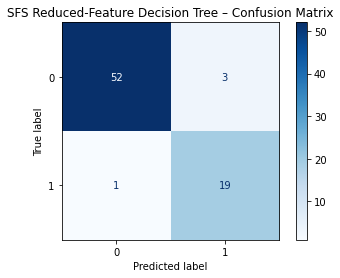

In [20]:
# -------- SFS (Sequential Forward Selection) --------
#    Uses the tuned best model's hyperparameters
print("\n---- SFS with Best Model ----")

# Extract tuned parameters for the decision tree
tree_params = {
    k.replace("clf__", ""): v
    for k, v in grid.best_params_.items() if k.startswith("clf__")
}

clf_for_sfs = DecisionTreeClassifier(
    random_state=RANDOM_STATE, **tree_params
)

sfs_prepro = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_num = sfs_prepro.fit_transform(X[numeric_cols])

sfs = SequentialFeatureSelector(
    clf_for_sfs,
    n_features_to_select=8,
    direction="forward",
    scoring=SCORER,
    cv=skf,
    n_jobs=-1
)

sfs.fit(X_num, y)
mask = sfs.get_support()
selected_features = [col for col, keep in zip(numeric_cols, mask) if keep]

print("Selected numeric features:", selected_features)

# Evaluate model using only selected features
X_train_s = X_train[selected_features]
X_test_s = X_test[selected_features]

X_train_s = sfs_prepro.fit_transform(X_train_s)
X_test_s = sfs_prepro.transform(X_test_s)

clf_for_sfs.fit(X_train_s, y_train)
y_pred_sfs = clf_for_sfs.predict(X_test_s)

print("\n---- SFS Reduced-Feature Model ----")
print(classification_report(y_test, y_pred_sfs))

# ---- CONFUSION MATRIX (SFS Model) ----
cm_sfs = confusion_matrix(y_test, y_pred_sfs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sfs)
plt.figure(figsize=(5,4))
disp.plot(values_format='d', cmap='Blues')
plt.title("SFS Reduced-Feature Decision Tree – Confusion Matrix")
plt.show()